**Install & Import Libraries**

In [ ]:
!pip install -q scikit-learn tensorflow pandas matplotlib seaborn plotly

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

print("Imports OK. TensorFlow version:", tf.__version__)

Imports OK. TensorFlow version: 2.19.0


**Load Both CSV Files (student-mat.csv & student-por.csv)**

In [ ]:
from google.colab import files
uploaded = files.upload()   # student-mat.csv and student-por.csv

# Check uploaded filenames
print("Uploaded files:", list(uploaded.keys()))

# Try to find expected filenames (fallback: try to locate by 'mat' and 'por' substrings)
fnames = list(uploaded.keys())
mat_file = next((f for f in fnames if 'mat' in f.lower()), None)
por_file = next((f for f in fnames if 'por' in f.lower()), None)

if mat_file is None or por_file is None:
    raise FileNotFoundError("Could not find both student-mat.csv and student-por.csv in uploaded files. "
                            "Please upload files named with 'mat' and 'por' in their filenames.")

# Load CSVs (they use semicolon separator)
df_mat = pd.read_csv(mat_file, sep=';')
df_por = pd.read_csv(por_file, sep=';')

# Trim column whitespace
df_mat.columns = df_mat.columns.str.strip()
df_por.columns = df_por.columns.str.strip()

print("Math shape:", df_mat.shape)
print("Portuguese shape:", df_por.shape)
display(df_mat.head())
display(df_por.head())

Saving student-mat.csv to student-mat (6).csv
Saving student-por.csv to student-por (6).csv
Uploaded files: ['student-mat (6).csv', 'student-por (6).csv']
Math shape: (395, 33)
Portuguese shape: (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


**Basic Information & Summary**

In [ ]:
print("=== Math Dataset Info ===")
display(df_mat.info())
print("\n=== Portuguese Dataset Info ===")
display(df_por.info())

print("\n--- Summary Statistics (math) ---")
display(df_mat.describe(include='all').T)

print("\n--- Summary Statistics (por) ---")
display(df_por.describe(include='all').T)

print("\nMissing values (Math):", df_mat.isnull().sum().sum())
print("Missing values (Portuguese):", df_por.isnull().sum().sum())
print("Duplicates (Math):", df_mat.duplicated().sum())
print("Duplicates (Portuguese):", df_por.duplicated().sum())


=== Math Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null

None


=== Portuguese Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 n

None


--- Summary Statistics (math) ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395.0,NaN,NaN,NaN,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395.0,NaN,NaN,NaN,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,NaN,NaN,NaN,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN



--- Summary Statistics (por) ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,649,2,GP,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,649,2,F,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,649.0,NaN,NaN,NaN,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
address,649,2,U,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,649,2,GT3,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,649,2,T,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,649.0,NaN,NaN,NaN,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,NaN,NaN,NaN,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
Mjob,649,5,other,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,649,5,other,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing values (Math): 0
Missing values (Portuguese): 0
Duplicates (Math): 0
Duplicates (Portuguese): 0


**Merge Datasets & Quick EDA**

In [ ]:
df_mat = df_mat.copy()
df_por = df_por.copy()

df_mat['subject'] = 'Math'
df_por['subject'] = 'Portuguese'

df_all = pd.concat([df_mat, df_por], ignore_index=True)

# Save an unmodified copy for visuals that expect original scales
df_orig = df_all.copy()

# Keep original G3 column for interpretable plots
df_all['G3_original'] = df_all['G3'].astype(float)

print("Combined shape:", df_all.shape)
display(df_all.head())
print("Columns:", df_all.columns.tolist())

Combined shape: (1044, 35)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,G3_original
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,Math,6.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,Math,6.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,Math,10.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,Math,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,Math,10.0


Columns: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject', 'G3_original']


**Handle Missing, Duplicates, Encode & Scale**

In [ ]:
print("Missing values per column (sum):")
display(df_all.isnull().sum().sort_values(ascending=False).head(20))

# Drop exact duplicates if any
dup_before = df_all.duplicated().sum()
df_all.drop_duplicates(inplace=True)
dup_after = df_all.duplicated().sum()
print(f"Dropped {dup_before - dup_after} exact duplicate rows.")

# Basic outlier check for numeric cols (just show extremes)
num_preview = df_all.select_dtypes(include=['int64','float64']).describe().T
display(num_preview[['min','25%','50%','75%','max']])

Missing values per column (sum):


,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


Dropped 0 exact duplicate rows.


,min,25%,50%,75%,max
age,15.0,16.0,17.0,18.0,22.0
Medu,0.0,2.0,3.0,4.0,4.0
Fedu,0.0,1.0,2.0,3.0,4.0
traveltime,1.0,1.0,1.0,2.0,4.0
studytime,1.0,1.0,2.0,2.0,4.0
failures,0.0,0.0,0.0,0.0,3.0
famrel,1.0,4.0,4.0,5.0,5.0
freetime,1.0,3.0,3.0,4.0,5.0
goout,1.0,2.0,3.0,4.0,5.0
Dalc,1.0,1.0,1.0,2.0,5.0


**Encoding categorical variables**

In [ ]:
# - Map obvious binary yes/no and sex into 0/1 using explicit mapping (safer than LabelEncoder)
# - One-hot encode multi-category columns

df = df_all.copy()

# Map known binary columns (these are from the UCI student dataset)
binary_mappings = {
    'sex': {'F':0, 'M':1},
    'schoolsup': {'no':0, 'yes':1},
    'famsup': {'no':0, 'yes':1},
    'paid': {'no':0, 'yes':1},
    'activities': {'no':0, 'yes':1},
    'nursery': {'no':0, 'yes':1},
    'higher': {'no':0, 'yes':1},
    'internet': {'no':0, 'yes':1},
    'romantic': {'no':0, 'yes':1},
    # Address and famsize and Pstatus sometimes are not strictly yes/no - map defensively:
    'address': {'U':1, 'R':0},          # U = urban, R = rural (1=urban)
    'famsize': {'GT3':1, 'LE3':0},      # GT3 = >3, LE3 = <=3
    'Pstatus': {'T':1, 'A':0}           # T = together, A = apart
}

for col, mapping in binary_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping).astype(int)

# One-hot encode the multi-category columns
multi_cat_cols = [c for c in ['school','Mjob','Fjob','reason','guardian','subject'] if c in df.columns]
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

print("After encoding shape:", df.shape)

After encoding shape: (1044, 44)


**Feature list, scale features**

In [ ]:
#Prepare features and scale numerical predictors (but do NOT scale target 'G3_original')
# Identify numeric columns (after encoding many are numeric)
all_numeric = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Ensure we keep target unscaled
target = 'G3_original'   # our interpretable target
if 'G3' in all_numeric and 'G3' != target:
    # drop the original (if exists) we will not use df['G3'] which may be same as target
    pass

# Define X columns (all except original G3 and G3 (if present) and G3_original)
drop_cols = [c for c in ['G3', 'G3_original'] if c in df.columns]
X_cols = [c for c in df.columns if c not in drop_cols and c != 'G3_original']

print("Number of features before scaling:", len(X_cols))

# Scale numeric features in X only
numeric_in_X = [c for c in X_cols if df[c].dtype.kind in 'fi']  # float/int
scaler = StandardScaler()
df[numeric_in_X] = scaler.fit_transform(df[numeric_in_X])

# Final shapes and quick check
print("Features (X) sample columns:", X_cols[:20])
print("Scaled numeric features sample (first 5 rows):")
display(df[numeric_in_X].head())


Number of features before scaling: 42
Features (X) sample columns: ['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime']
Scaled numeric features sample (first 5 rows):


,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,-0.875498,1.027889,0.612776,0.643921,-2.761901,1.242077,1.466302,0.652210,0.035606,-0.403106,...,-0.742471,0.068788,-0.195099,0.732511,-0.542374,-0.999995,-0.381387,0.252155,-2.083727,-1.597738
1,-0.875498,0.221035,0.612776,0.643921,0.362069,-1.426089,-1.262431,-0.715074,0.035606,-0.403106,...,-0.742471,1.140653,-0.195099,-0.135527,-0.542374,-0.999995,-0.381387,-0.070060,-2.083727,-1.902291
2,-0.875498,-1.392674,0.612776,-1.552986,0.362069,-1.426089,-1.262431,-0.715074,0.035606,4.171268,...,-0.742471,0.068788,-0.195099,-1.003566,0.554987,0.557044,-0.381387,0.896584,-1.413029,-0.988631
3,-0.875498,-1.392674,0.612776,0.643921,0.362069,1.242077,-0.352853,-0.715074,1.234713,-0.403106,...,1.346854,-1.003076,-1.165019,-1.003566,-0.542374,-0.999995,1.023086,-0.392275,1.269766,0.838688
4,-0.875498,-0.585820,0.612776,0.643921,0.362069,0.352689,0.556724,-0.715074,0.035606,-0.403106,...,-0.742471,0.068788,-0.195099,-1.003566,-0.542374,-0.221475,1.023086,-0.070060,-1.748378,-0.379525


**Train/Validation/Test Split**

In [ ]:
# Split into train/val/test
X = df[X_cols]
y = df[target].astype(float)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print("Train:", X_train.shape, " Validation:", X_val.shape, " Test:", X_test.shape)

Train: (730, 42)  Validation: (157, 42)  Test: (157, 42)


**Data Visualizations**

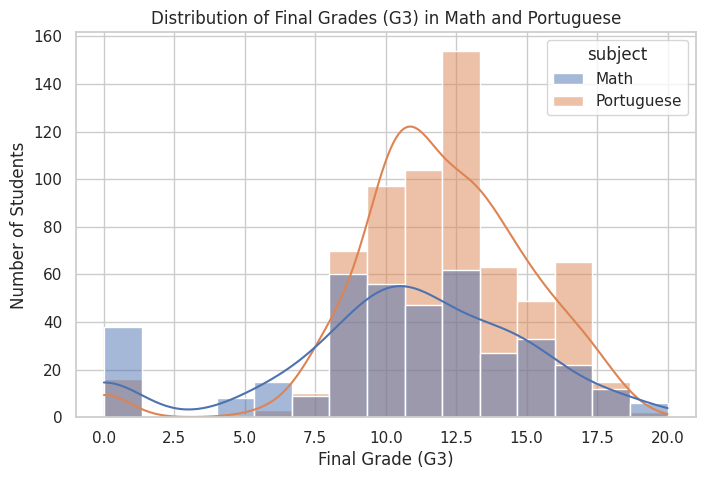

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visual 1: Distribution of final grades (original scale)
plt.figure(figsize=(8,5))
sns.histplot(data=df_orig, x='G3', hue='subject', kde=True, bins=15)
plt.title('Distribution of Final Grades (G3) in Math and Portuguese')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.show()

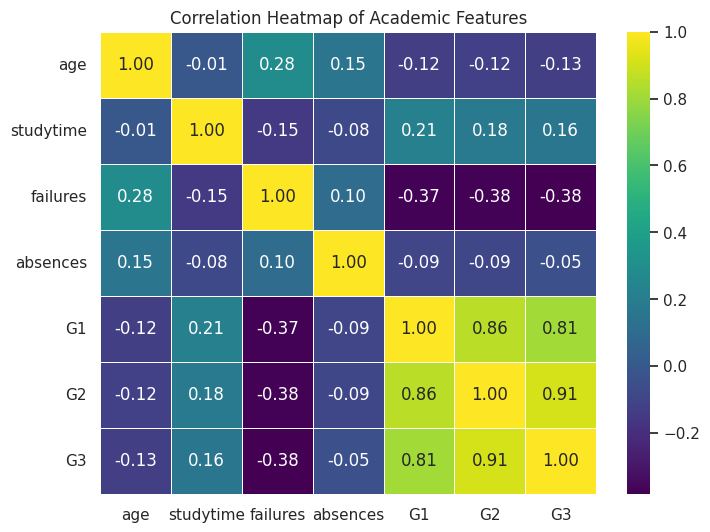

In [ ]:
# Visual 2: Correlation heatmap (use original numeric columns G1,G2,G3,age,studytime)
corr_cols = ['age','studytime','failures','absences','G1','G2','G3']
plt.figure(figsize=(8,6))
sns.heatmap(df_orig[corr_cols].corr(), annot=True, fmt=".2f", cmap="viridis", linewidths=0.5)
plt.title('Correlation Heatmap of Academic Features')
plt.show()

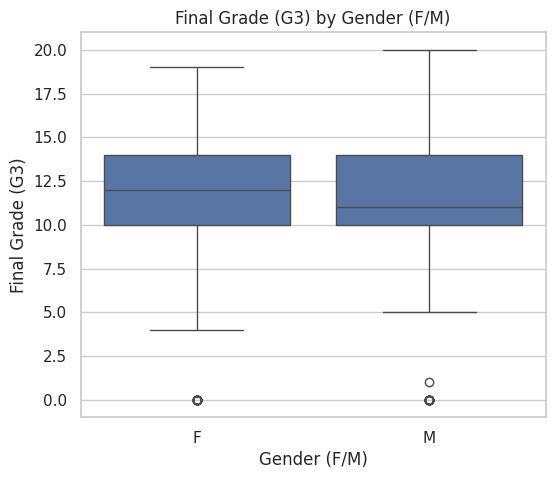

In [ ]:
# Visual 3: Boxplot gender vs final grade (use original G3)
plt.figure(figsize=(6,5))
sns.boxplot(x=df_orig['sex'], y=df_orig['G3'])
plt.title('Final Grade (G3) by Gender (F/M)')
plt.xlabel('Gender (F/M)')
plt.ylabel('Final Grade (G3)')
plt.show()

/tmp/ipython-input-376188131.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='studytime', y='G3', hue='subject', data=grp, ci=None)


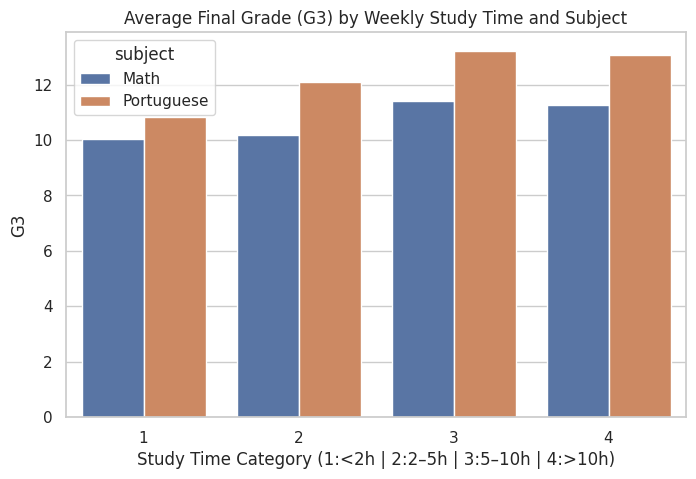

In [ ]:
# Visual 4: Study time vs average final grade (grouped)
grp = df_orig.groupby(['studytime','subject'])['G3'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='studytime', y='G3', hue='subject', data=grp, ci=None)
plt.title('Average Final Grade (G3) by Weekly Study Time and Subject')
plt.xlabel('Study Time Category (1:<2h | 2:2–5h | 3:5–10h | 4:>10h)')
plt.show()

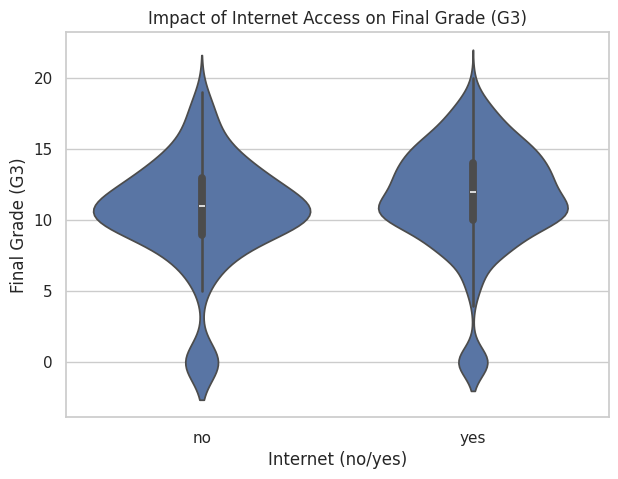

In [ ]:
# Visual 5: Internet access vs final grade (violin)
plt.figure(figsize=(7,5))
sns.violinplot(x=df_orig['internet'], y=df_orig['G3'])
plt.title('Impact of Internet Access on Final Grade (G3)')
plt.xlabel('Internet (no/yes)')
plt.ylabel('Final Grade (G3)')
plt.show()

**Build & Train Deep Learning Model (MLP)**

In [ ]:
# Model building (MLP for regression)
input_dim = X_train.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')   # regression output (G3)
])

model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,825 (54.00 KB)

 Trainable params: 13,825 (54.00 KB)

 Non-trainable params: 0 (0.00 B)

**Train model**

In [ ]:
# Training (with early stopping)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 131.6306 - mae: 10.8404 - val_loss: 71.9550 - val_mae: 7.8358
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54.7783 - mae: 6.7058 - val_loss: 11.9298 - val_mae: 2.8060
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.0311 - mae: 2.8034 - val_loss: 5.7712 - val_mae: 1.7672
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.9249 - mae: 2.2999 - val_loss: 5.3160 - val_mae: 1.7529
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.1673 - mae: 2.0899 - val_loss: 4.5447 - val_mae: 1.5579
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4056 - mae: 1.9909 - val_loss: 4.5879 - val_mae: 1.6092
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.0026 - mae: 1.9141 - val_loss: 4.4466 - val_mae: 1.5785
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.1532 - mae: 1.9478 - val_loss: 4.1519 - val_mae: 1.4915
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

**Result Visualizations (Model Evaluation)**

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {test_loss:.4f} | Test MAE: {test_mae:.4f}")

# Predictions
y_pred = model.predict(X_test).flatten()

Test MSE: 5.0857 | Test MAE: 1.3922
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


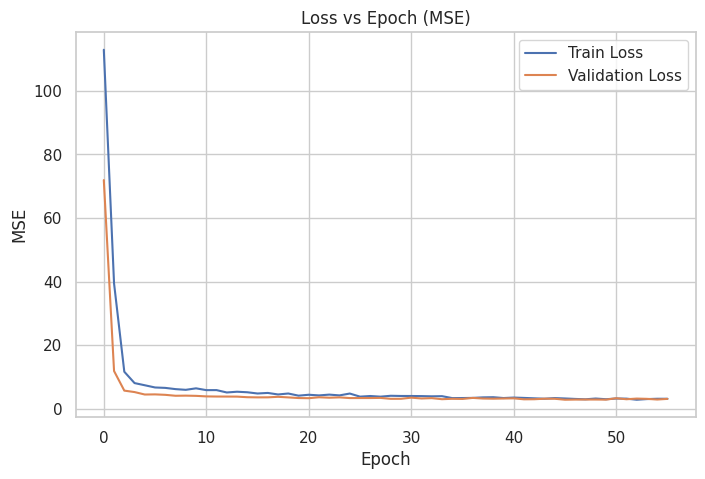

In [ ]:
# Loss vs epoch
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epoch (MSE)')
plt.xlabel('Epoch'); plt.ylabel('MSE')
plt.legend()
plt.show()

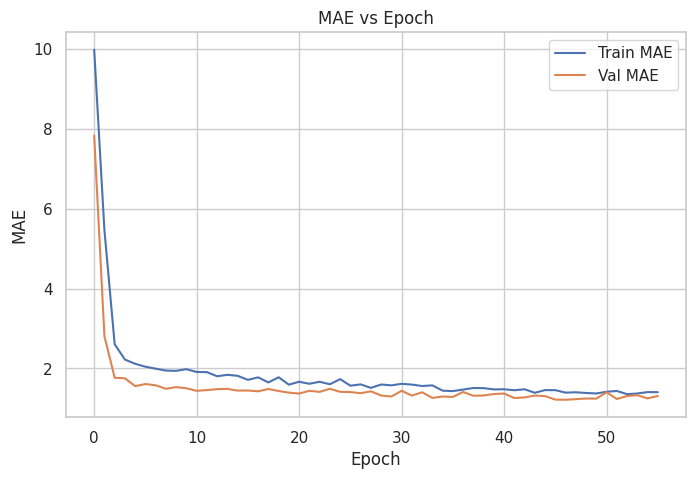

In [ ]:
# MAE vs epoch
plt.figure(figsize=(8,5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE vs Epoch')
plt.xlabel('Epoch'); plt.ylabel('MAE')
plt.legend()
plt.show()

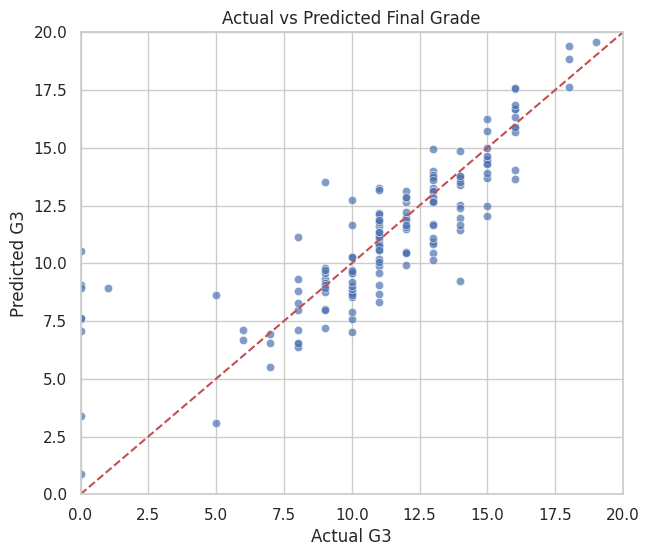

In [ ]:
# Actual vs Predicted (original G3 scale)
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
lims = [0, 20]  # G3 in UCI data is 0-20
plt.plot(lims, lims, 'r--')
plt.xlabel('Actual G3'); plt.ylabel('Predicted G3')
plt.title('Actual vs Predicted Final Grade')
plt.xlim(lims); plt.ylim(lims)
plt.show()

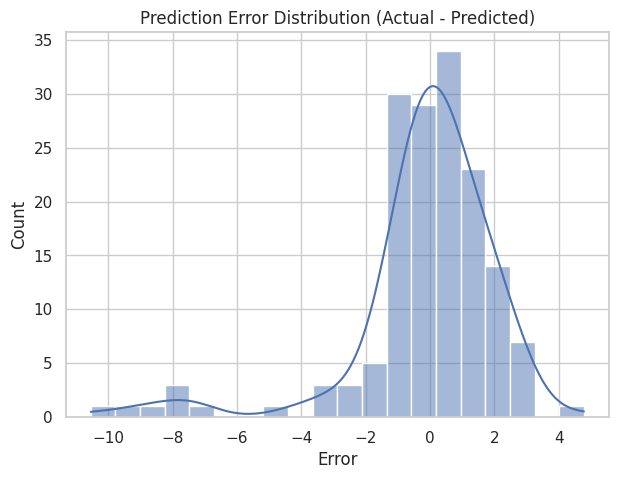

In [ ]:
# Error distribution
errors = y_test - y_pred
plt.figure(figsize=(7,5))
sns.histplot(errors, bins=20, kde=True)
plt.title('Prediction Error Distribution (Actual - Predicted)')
plt.xlabel('Error')
plt.show()

In [ ]:
# Numeric metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.3f} | RMSE: {rmse:.3f} | R²: {r2:.3f}")

MAE: 1.392 | RMSE: 2.255 | R²: 0.648
